# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Bongo, Seakhoa**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#seven>8. Pipeline Developement</a>

The supply of electricity plays a large role in the livelihood of citizens in a country. Electricity, amongst other things, helps us stay connected, keep warm, and feed our families. Therefore there's a need to keep the lights on in order to maintain and improve the standard of living by investing in electricity infrastructure. However, in recent years, there has been evidence that the use of purely non-renewable sources is not sustainable.

The government of Spain is considering an expansion of its renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the country's renewable sources and fossil fuel energy generation. For this very reason, the government of Spain has been tracking the different energy sources available within the country.

In this project, you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Libraries for data preparation and model building

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import lightgbm as ltb
from sklearn.linear_model import LinearRegression

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 6

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#This is the training data for the model 
df_train = pd.read_csv('df_train.csv')

In [3]:
#This is the testing data for the model 
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
#looking at the data 
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


### 3.1 Looking at data statistics

In [5]:
#looking for missing values 
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

We have found above that df.Valencia_pressure has missing data for 2060 rows and have chosen to replace these missing values with the median values of the other rows in the column.

In [6]:
#looking at the summary statistics 
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [7]:
#checking for duplicates 
df_train.duplicated().any()

False

There are no duplicates in the training set

In [8]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

### 3.2 plot relevant feature interactions

<Figure size 576x360 with 0 Axes>

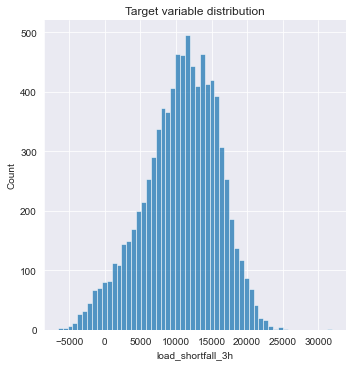

In [9]:
#Ploting target distribution 
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.displot(df_train.load_shortfall_3h)
plt.title('Target variable distribution')
plt.show()

We see that the target value has a normal distribution 

#### 3.2.1 Visualising Outliers in the data

c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\si

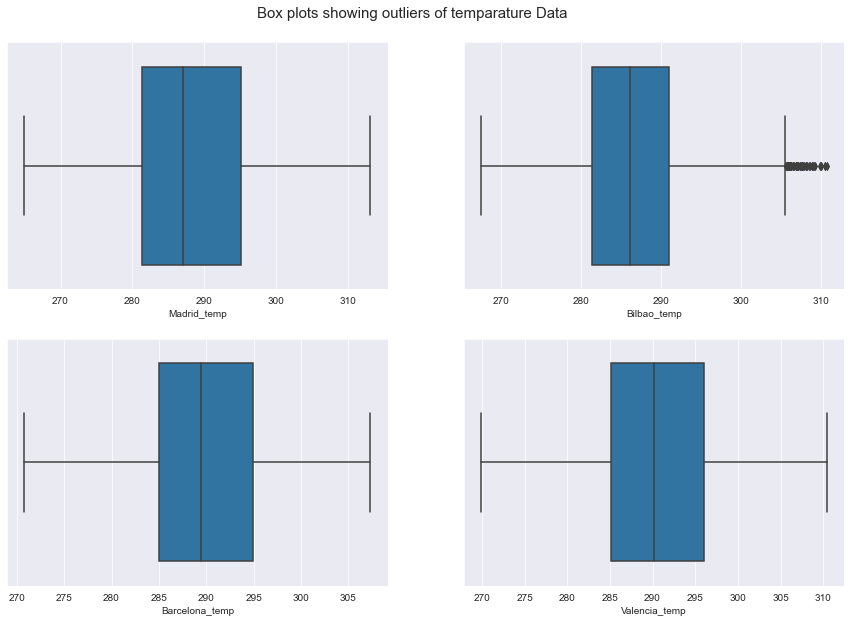

In [10]:
#Temparature Data

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers of temparature Data', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_train, ['Madrid_temp',	'Bilbao_temp',	'Barcelona_temp',	'Valencia_temp']):
  sns.boxplot(df_train[name], ax = ax)

plt.show()

We see Above that the temparature data is centered forllowing a normal distribution thus no further modification is needed in terms of normalisation the values for the temparature are given in kelvin.

c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\si

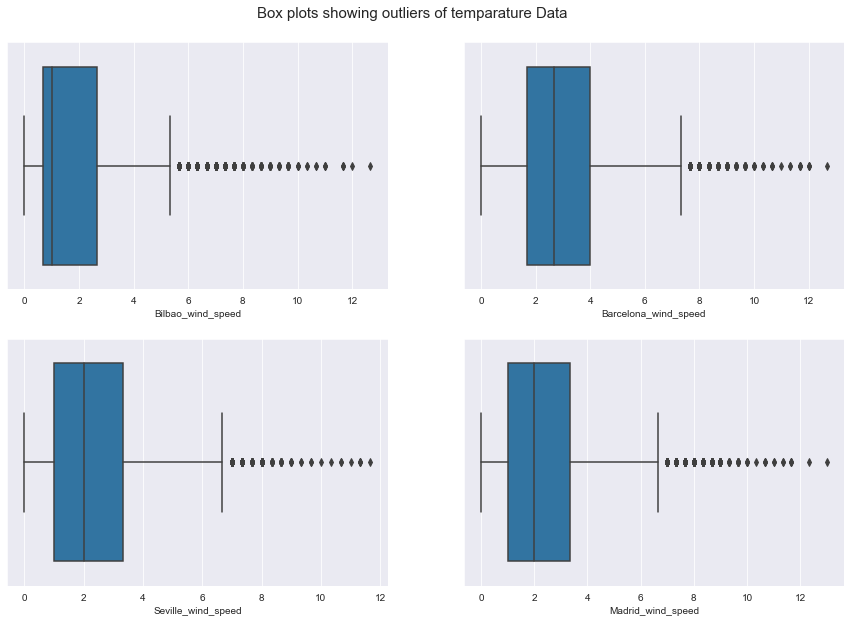

In [11]:
#Wind Speed
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers of temparature Data', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_train, ['Bilbao_wind_speed',	'Barcelona_wind_speed',	'Seville_wind_speed',	'Madrid_wind_speed']):
  sns.boxplot(df_train[name], ax = ax)

plt.show()

We see here that the wind speed data is skew and thus it needs to be normalised before we can use it in our model

c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


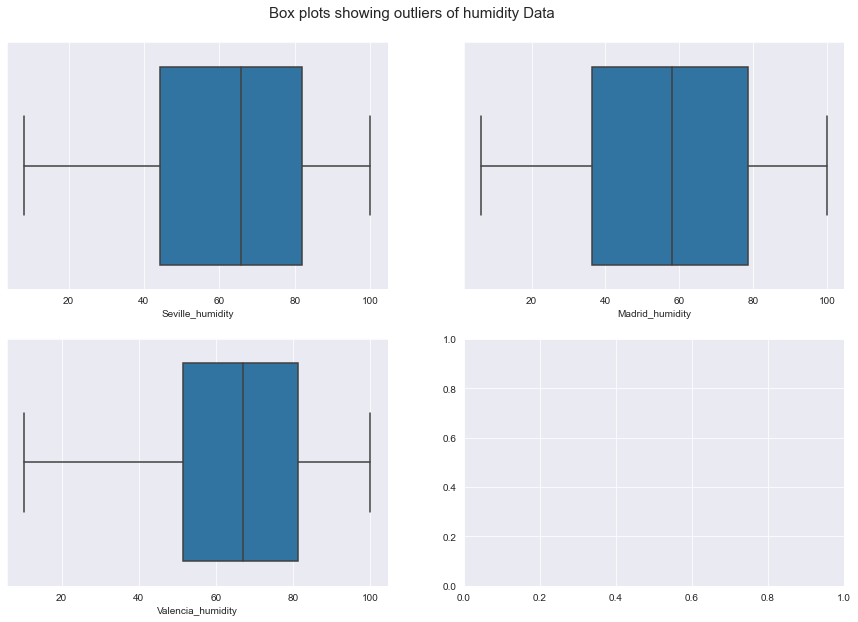

In [12]:
#Humidity 
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers of humidity Data', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_train, ['Seville_humidity','Madrid_humidity','Valencia_humidity']):
  sns.boxplot(df_train[name], ax = ax)

plt.show()

There is no data for Barcelona in terms of Humidity, by the shape of the data we see some skewness in the seville and valencia data but nothing that is too much for comfort there is also skewness in madrid_humidity data 

c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


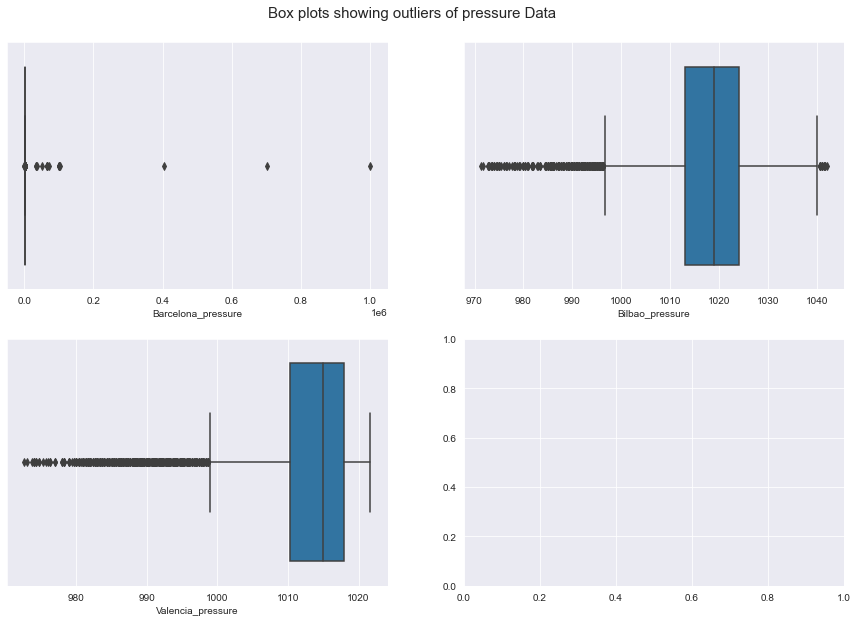

In [13]:
#Pressure 
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers of pressure Data', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_train, ['Barcelona_pressure','Bilbao_pressure','Valencia_pressure']):
  sns.boxplot(df_train[name], ax = ax)

plt.show()

The pressure data seems to show different problems with this dataset from the Barcelona data we see extreme outliers that are present in the data the Bilbao and valencia features show skewness. Seville_pressure is also a categorical value and not a number and will thus need to be one hot encoded 

c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Bongo\anaconda3\lib\si

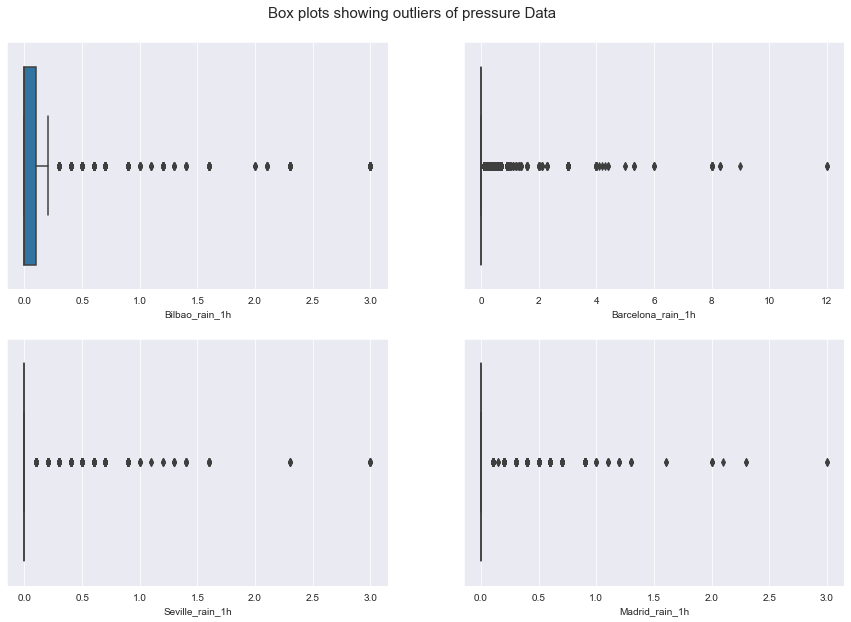

In [14]:
#Rain 1_hour
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers of pressure Data', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_train, ['Bilbao_rain_1h','Barcelona_rain_1h','Seville_rain_1h','Madrid_rain_1h']):
  sns.boxplot(df_train[name], ax = ax)

plt.show()

#### 3.2.3 looking at data skewness

In [15]:
#features with negative skewness
df_train.skew() < -1

C:\Users\Bongo\AppData\Local\Temp\ipykernel_281568\3306835069.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew() < -1


Unnamed: 0              False
Madrid_wind_speed       False
Bilbao_rain_1h          False
Valencia_wind_speed     False
Seville_humidity        False
Madrid_humidity         False
Bilbao_clouds_all       False
Bilbao_wind_speed       False
Seville_clouds_all      False
Bilbao_wind_deg         False
Barcelona_wind_speed    False
Barcelona_wind_deg      False
Madrid_clouds_all       False
Seville_wind_speed      False
Barcelona_rain_1h       False
Seville_rain_1h         False
Bilbao_snow_3h          False
Barcelona_pressure      False
Seville_rain_3h         False
Madrid_rain_1h          False
Barcelona_rain_3h       False
Valencia_snow_3h        False
Madrid_weather_id        True
Barcelona_weather_id     True
Bilbao_pressure         False
Seville_weather_id       True
Valencia_pressure        True
Seville_temp_max        False
Madrid_pressure          True
Valencia_temp_max       False
Valencia_temp           False
Bilbao_weather_id        True
Seville_temp            False
Valencia_h

In [16]:
#features with positive skewness
df_train.skew() > 1

C:\Users\Bongo\AppData\Local\Temp\ipykernel_281568\4046936407.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew() > 1


Unnamed: 0              False
Madrid_wind_speed        True
Bilbao_rain_1h           True
Valencia_wind_speed      True
Seville_humidity        False
Madrid_humidity         False
Bilbao_clouds_all       False
Bilbao_wind_speed        True
Seville_clouds_all       True
Bilbao_wind_deg         False
Barcelona_wind_speed     True
Barcelona_wind_deg      False
Madrid_clouds_all        True
Seville_wind_speed       True
Barcelona_rain_1h        True
Seville_rain_1h          True
Bilbao_snow_3h           True
Barcelona_pressure       True
Seville_rain_3h          True
Madrid_rain_1h           True
Barcelona_rain_3h        True
Valencia_snow_3h         True
Madrid_weather_id       False
Barcelona_weather_id    False
Bilbao_pressure         False
Seville_weather_id      False
Valencia_pressure       False
Seville_temp_max        False
Madrid_pressure         False
Valencia_temp_max       False
Valencia_temp           False
Bilbao_weather_id       False
Seville_temp            False
Valencia_h

In [17]:
# Features with moderate skew
df_train.skew().between(-1, -0.5, inclusive = 'neither')

C:\Users\Bongo\AppData\Local\Temp\ipykernel_281568\1302851521.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew().between(-1, -0.5, inclusive = 'neither')


Unnamed: 0              False
Madrid_wind_speed       False
Bilbao_rain_1h          False
Valencia_wind_speed     False
Seville_humidity        False
Madrid_humidity         False
Bilbao_clouds_all       False
Bilbao_wind_speed       False
Seville_clouds_all      False
Bilbao_wind_deg         False
Barcelona_wind_speed    False
Barcelona_wind_deg      False
Madrid_clouds_all       False
Seville_wind_speed      False
Barcelona_rain_1h       False
Seville_rain_1h         False
Bilbao_snow_3h          False
Barcelona_pressure      False
Seville_rain_3h         False
Madrid_rain_1h          False
Barcelona_rain_3h       False
Valencia_snow_3h        False
Madrid_weather_id       False
Barcelona_weather_id    False
Bilbao_pressure          True
Seville_weather_id      False
Valencia_pressure       False
Seville_temp_max        False
Madrid_pressure         False
Valencia_temp_max       False
Valencia_temp           False
Bilbao_weather_id       False
Seville_temp            False
Valencia_h

There are 24 features that show varying states of skewness

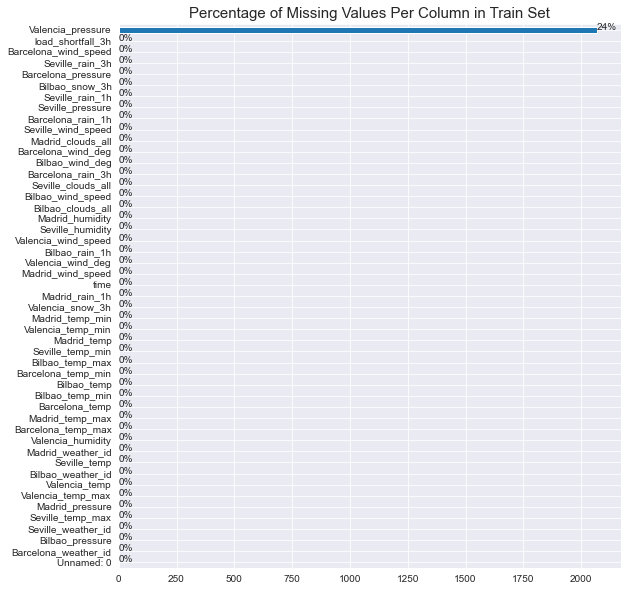

In [18]:
# Plot missing values in train set
ax = df_train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
plt.show()

The missing values for the valencia_pressure row exceed 10% so thus it is most advisable to replace these missing values with the median of the row.

### 3.3 evaluate correlation

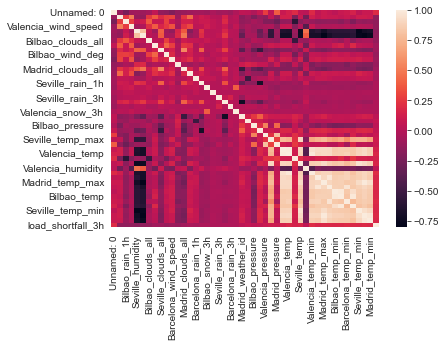

In [19]:
# evaluate correlation
#correlation matrix
sns.heatmap(df_train.corr())
plt.show()

We see from the above heatmap that there is a high correlation between the temparature data and the load shortfall 

In [20]:
#Numerical representation of the corrilation between features
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [21]:
#Getting the shape of the data 
df_train.shape

(8763, 49)

We have **8763** observations, **47** features and **1** target variable.

In [22]:
#Checking for null values in the columns 
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

We see that Valencia_pressure is missing values

### 4.1 Impute missing values/ features

Impute ```Valencia_pressure``` with the median.

In [23]:
# Impute Valencia_pressure with the median
median = df_train['Valencia_pressure'].median()
df_train['Valencia_pressure'].fillna(median, inplace=True)

In [24]:
#Checking if there are any other null values present in the data
df_train.isnull().sum().any()

False

The misising values have been imputed with the median of the dataframe 

### 4.2 Engineer existing features

In [25]:
# create new features from the time column 
df_train['time']=pd.to_datetime(df_train['time'], infer_datetime_format=True) 
df_train['time_int']= pd.to_numeric(df_train['time'].dt.strftime("%Y%m%d%H%M%S"))

In [26]:
#Looking at the column type 
df_train['time_int'].dtypes

dtype('int64')

The above is an integer representation of the ```time``` column to a numeric type for future usage across different types of models 

#### 4.2.1 **Normalize** features that show skewness.

In [27]:
#Normalize 23 features
features = ['Bilbao_pressure', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id',
            'Valencia_pressure', 'Madrid_pressure', 'Bilbao_weather_id', 'Madrid_wind_speed',
            'Bilbao_rain_1h', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_clouds_all',
            'Barcelona_wind_speed', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
            'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
            'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h']

from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()

df_train[features]=normalize.fit_transform(df_train[features])

In [28]:
#Looking at the shape of the data 
df_train.shape

(8763, 50)

#### 4.2.2 One hot encoding 

There is a caviat here we have decided against creating too many features in this dataframe so we will encode the values directly into the columns and replace them the columns of interest being ```Valencia_wind_deg```, ```Seville_pressure```

In [29]:
#looking at the unique values in valencia_wind_deg
df_train['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

In [30]:
#replacing the string values with the numeric values
df_train['Valencia_wind_deg'].replace({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 'level_7':7, 'level_6':6,
       'level_4':4, 'level_3':3, 'level_1':1, 'level_2':2},inplace=True)

In [31]:
#looking at the string values in Seville_pressure
df_train['Seville_pressure'].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

In [32]:
#Replacing the string values in Seville_pressure with numeric values
df_train['Seville_pressure'].replace({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19,
       'sp22':22, 'sp11':11, 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20,
       'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10, 'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1},inplace=True)

In [33]:
#Visual inspection of unique values also validating column type 
df_train.Seville_pressure.unique()

array([25, 23, 24, 21, 16,  9, 15, 19, 22, 11,  8,  4,  6, 13, 17, 20, 18,
       14, 12,  5, 10,  7,  3,  2,  1], dtype=int64)

In [34]:
#Visual inspection of unique values also validating column type 
df_train.Valencia_wind_deg.unique()

array([ 5, 10,  9,  8,  7,  6,  4,  3,  1,  2], dtype=int64)

In [35]:
#Looking at the shape of the data 
df_train.shape

(8763, 50)

In [36]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_int
0,0,2015-01-01 03:00:00,0.051282,5,0.0,0.012821,74.333333,64.000000,0.0,0.078947,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,20150101030000
1,1,2015-01-01 06:00:00,0.025641,10,0.0,0.032051,78.333333,64.666667,0.0,0.078947,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,20150101060000
2,2,2015-01-01 09:00:00,0.076923,9,0.0,0.019231,71.333333,64.333333,0.0,0.078947,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,20150101090000
3,3,2015-01-01 12:00:00,0.076923,8,0.0,0.019231,65.333333,56.333333,0.0,0.078947,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,20150101120000
4,4,2015-01-01 15:00:00,0.076923,7,0.0,0.019231,59.000000,57.000000,2.0,0.026316,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,20150101150000


### 4.3 Regularisation 

In [37]:
# target variable, the variable we want to predict
y_df_train = df_train['load_shortfall_3h']

In [38]:
# features for modeling
X_df_train = df_train.drop(labels = ['Unnamed: 0', 'time', 'load_shortfall_3h'], axis = 1)

In [39]:
#Regularixing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df_train)
X_standardise = pd.DataFrame(X_scaled,columns=X_df_train.columns)
X_standardise.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time_int
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.294602
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.294598
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.294595
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.294591
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.294587


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### 5.1 Split Data

In this part of the modeling we will split data in tho to test and train sec

In [40]:
#Features for training
X_standardise.shape

(8763, 47)

In [41]:
#target variables
y_df_train.shape

(8763,)

In [42]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X_standardise, y_df_train, test_size = 0.3, random_state = PARAMETER_CONSTANT)

### 5.2 create one or more ML models

#### 5.2.1 Instantiating Model 1(DescisionTreeRegressor)

In [43]:
#DescisionTreeRegressor

reg_decision_model=DecisionTreeRegressor(random_state=PARAMETER_CONSTANT)
reg_decision_model.fit(X_train,y_train)
m1_pred =reg_decision_model.predict(X_test)

In [44]:
# evaluate more ML model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,m1_pred))
print('MSE:', metrics.mean_squared_error(y_test, m1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m1_pred)))

MAE: 3855.733295296058
MSE: 26545285.448517602
RMSE: 5152.211704551512


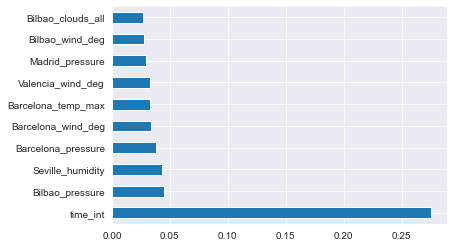

In [45]:
#Looking at the most important features 
feat_importances = pd.Series(reg_decision_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 5.2.2 Instantiating Model 2 (Random forrest regressor)

In [46]:
# create ML model
rf_decision_model=RandomForestRegressor(random_state=PARAMETER_CONSTANT)
rf_decision_model.fit(X_train,y_train)
m2_pred =rf_decision_model.predict(X_test)

In [47]:
# evaluate ML model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,m2_pred))
print('MSE:', metrics.mean_squared_error(y_test, m2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m2_pred)))

MAE: 2920.5308875364526
MSE: 13847284.975279523
RMSE: 3721.194025481542


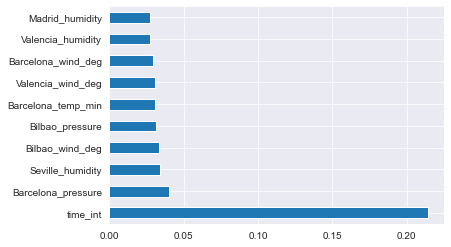

In [48]:
#Looking at the most important features 
feat_importances = pd.Series(rf_decision_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 5.2.3 Instantiating Model 3 (Gradient Boosting regressor)

In [49]:
# create ML model
gbr = GradientBoostingRegressor(random_state=PARAMETER_CONSTANT)
gbr.fit(X_train, y_train)
m3_pred = gbr.predict(X_test)

In [50]:
# evaluate ML model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,m3_pred))
print('MSE:', metrics.mean_squared_error(y_test, m3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m3_pred)))

MAE: 3446.2880165678957
MSE: 18816640.86423883
RMSE: 4337.815217853203


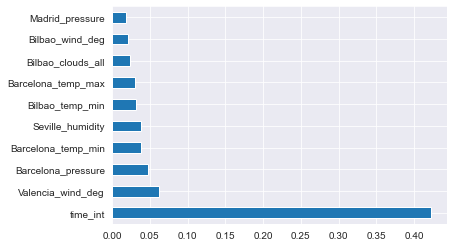

In [51]:
#Looking at the most important features 
feat_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 5.2.4 Instantiating Model 4 (LightGBM regressor)

In [52]:
# create ML model
import re
df_ltb_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_ltb_test =  X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
ltb_reg = ltb.LGBMRegressor(random_state=PARAMETER_CONSTANT)
ltb_reg.fit(df_ltb_train, y_train)
m4_pred = ltb_reg.predict(df_ltb_test)

In [53]:
# evaluate ML model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, m4_pred))
print('MSE:', metrics.mean_squared_error(y_test, m4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m4_pred)))

MAE: 3037.727490019447
MSE: 14842442.925516576
RMSE: 3852.589119737086


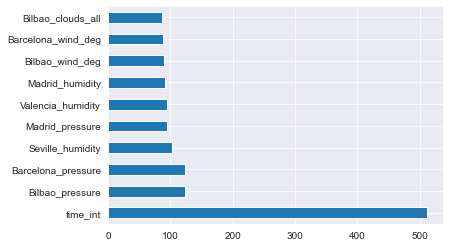

In [54]:
#Looking at the most important features 
feat_importances = pd.Series(ltb_reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 5.2.4 Instantiating Model 5 (LinearRegression)

In [55]:
# create ML model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
m5_pred = lin_reg.predict(X_test)

In [56]:
# evaluate ML model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, m5_pred))
print('MSE:', metrics.mean_squared_error(y_test, m5_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m5_pred)))

MAE: 3841.134291793383
MSE: 23386234.059109464
RMSE: 4835.931560631257


### Evaluate one or more ML models

In [57]:
# Compare model performance
mm=pd.DataFrame(data={'Model':['Model 1','Model 2','Model 3','Model 4','Model 5'],
    'MAE': [metrics.mean_absolute_error(y_test,m1_pred), metrics.mean_absolute_error(y_test,m2_pred),metrics.mean_absolute_error(y_test, m3_pred),metrics.mean_absolute_error(y_test,m4_pred),metrics.mean_absolute_error(y_test, m5_pred)],
    'MSE': [metrics.mean_squared_error(y_test, m1_pred), metrics.mean_squared_error(y_test, m2_pred),metrics.mean_squared_error(y_test, m3_pred), metrics.mean_squared_error(y_test, m4_pred),metrics.mean_squared_error(y_test, m5_pred)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, m1_pred)), np.sqrt(metrics.mean_squared_error(y_test, m2_pred)),np.sqrt(metrics.mean_squared_error(y_test, m3_pred)), np.sqrt(metrics.mean_squared_error(y_test,m4_pred)),np.sqrt(metrics.mean_squared_error(y_test, m5_pred))]})
mm

,Model,MAE,MSE,RMSE
0,Model 1,3855.733295,2.654529e+07,5152.211705
1,Model 2,2920.530888,1.384728e+07,3721.194025
2,Model 3,3446.288017,1.881664e+07,4337.815218
3,Model 4,3037.727490,1.484244e+07,3852.589120
4,Model 5,3841.134292,2.338623e+07,4835.931561


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [58]:
# Compare model performance
mm=pd.DataFrame(data={'Model':['Model 1','Model 2','Model 3','Model 4','Model 5'],
    'MAE': [metrics.mean_absolute_error(y_test,m1_pred), metrics.mean_absolute_error(y_test,m2_pred),metrics.mean_absolute_error(y_test, m3_pred),metrics.mean_absolute_error(y_test,m4_pred),metrics.mean_absolute_error(y_test, m5_pred)],
    'MSE': [metrics.mean_squared_error(y_test, m1_pred), metrics.mean_squared_error(y_test, m2_pred),metrics.mean_squared_error(y_test, m3_pred), metrics.mean_squared_error(y_test, m4_pred),metrics.mean_squared_error(y_test, m5_pred)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, m1_pred)), np.sqrt(metrics.mean_squared_error(y_test, m2_pred)),np.sqrt(metrics.mean_squared_error(y_test, m3_pred)), np.sqrt(metrics.mean_squared_error(y_test,m4_pred)),np.sqrt(metrics.mean_squared_error(y_test, m5_pred))]})
mm

,Model,MAE,MSE,RMSE
0,Model 1,3855.733295,2.654529e+07,5152.211705
1,Model 2,2920.530888,1.384728e+07,3721.194025
2,Model 3,3446.288017,1.881664e+07,4337.815218
3,Model 4,3037.727490,1.484244e+07,3852.589120
4,Model 5,3841.134292,2.338623e+07,4835.931561


#### Choose best model and motivate why it is the best choice
From the table above we can see that model 2 has the lowest RMSE score even before it has been tuned thus we will use this model as it shows the best prospects of giving us the best results, If there is still time available Model 4 will also be tuned and evaluated.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

#### discuss chosen methods logic
##### Ensemble Learning:
Suppose you want to watch a web series on Netflix. Will you just log in to your account and watch the first webisode that pops up or will you browse a few web pages, compare the ratings and then make a decision. Yes. It’s highly likely that you will go for the second option and instead of making a direct conclusion you will consider other options as well.

That’s exactly how Ensemble learning works. Ensemble learning is a technique that combines the predictions from multiple machine learning algorithms to concoct more accurate predictions than any individual model alone. In simple words, an ensemble model is one that comprises of many models. There are many ensemble techniques like Stacking, Bagging, Blending etc. Let’s take a detailed look into a few of them.

## 8.Pipeline Developement & Model Tuning 

### Model 2 (Random Forrest Regressor)

In [59]:
#Model Tuning

from sklearn.metrics import make_scorer
mse = make_scorer(mean_squared_error,greater_is_better=False)

param_grid = {'bootstrap': [True],
 'max_depth': [30],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [1000]}

rfr_final = RandomForestRegressor(random_state=PARAMETER_CONSTANT)
rf_grid_search = GridSearchCV(estimator = rfr_final, param_grid = param_grid, cv = 5, verbose=4, n_jobs = -1, scoring = mse)

In [60]:
# Getting the best paramiters
rf_grid_search.fit(X_train, y_train)
print(rf_grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [61]:
#Printing the best hyperparamiters
print(rf_grid_search.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


Please note that the above gridsearch has been stripped during the model tuning process the hyperparamiters to be fitted to the model are not the initial ones that we started with this has been done to preserve computing power and time when the whole notebook is run

We will now bypass the gridsearch and use the paramiters directly in our new model

In [62]:
best_rf = rf_grid_search.best_estimator_
m2_pred_refined = best_rf.predict(X_test)

In [63]:
# Compare model performance
mm=pd.DataFrame(data={'Model':['Model 1','Model 2','Model 3','Model 4','Model 5','Tuned Model 2'],
    'MAE': [metrics.mean_absolute_error(y_test,m1_pred), metrics.mean_absolute_error(y_test,m2_pred),metrics.mean_absolute_error(y_test, m3_pred),metrics.mean_absolute_error(y_test,m4_pred),metrics.mean_absolute_error(y_test, m5_pred),metrics.mean_absolute_error(y_test, m2_pred_refined)],
    'MSE': [metrics.mean_squared_error(y_test, m1_pred), metrics.mean_squared_error(y_test, m2_pred),metrics.mean_squared_error(y_test, m3_pred), metrics.mean_squared_error(y_test, m4_pred),metrics.mean_squared_error(y_test, m5_pred),metrics.mean_squared_error(y_test, m2_pred_refined)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, m1_pred)), np.sqrt(metrics.mean_squared_error(y_test, m2_pred)),np.sqrt(metrics.mean_squared_error(y_test, m3_pred)), np.sqrt(metrics.mean_squared_error(y_test,m4_pred)),np.sqrt(metrics.mean_squared_error(y_test, m5_pred)),np.sqrt(metrics.mean_squared_error(y_test, m2_pred_refined))]})
mm

,Model,MAE,MSE,RMSE
0,Model 1,3855.733295,2.654529e+07,5152.211705
1,Model 2,2920.530888,1.384728e+07,3721.194025
2,Model 3,3446.288017,1.881664e+07,4337.815218
3,Model 4,3037.727490,1.484244e+07,3852.589120
4,Model 5,3841.134292,2.338623e+07,4835.931561
5,Tuned Model 2,2900.645303,1.365091e+07,3694.714378


## 9.Preparing the test data and submittion file 

In this section we will prepare the test data for undergoing machine learning the preparation is very similar to what we did with the train data set 

In [64]:
#Testing if there are null values present in the test data from the train data we have an idea of where to find them 
df_test.isnull().sum().any()

True

In [65]:
# Impute Valencia_pressure with the median
median_test = df_test['Valencia_pressure'].median()
df_test['Valencia_pressure'].fillna(median_test, inplace=True)

In [66]:
#Testing if there are any other null values 
df_test.isnull().sum().any()

False

In [67]:
# create new features from the time column 
df_test['time']=pd.to_datetime(df_test['time'], infer_datetime_format=True) 
df_test['time_int']= pd.to_numeric(df_test['time'].dt.strftime("%Y%m%d%H%M%S"))

In [68]:
#Looking at the type of the 'time int' column to make sure it is numeric  
df_test['time_int'].dtypes

dtype('int64')

In [69]:
#Normalizing skew features 
df_test[features]=normalize.fit_transform(df_test[features])

#### 9.1 Replacing strings with numbers

This method is chosen over creating new features that one hot encoding would do this is thus the prefered method as the number of features are kept to a minimum and categorical variables are retained these columns are aso now numeric allowing them to be further processed uniformaly with the rest of the data 

In [70]:
#Replacing the valencia_wind_deg string values with numeric values 
df_test['Valencia_wind_deg'].replace({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 'level_7':7, 'level_6':6,
       'level_4':4, 'level_3':3, 'level_1':1, 'level_2':2},inplace=True)

In [71]:
#Replacing the Seville_pressure string values with numeric values 
df_test['Seville_pressure'].replace({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19,
       'sp22':22, 'sp11':11, 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20,
       'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10, 'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1},inplace=True)

In [72]:
# features for modeling
X_df_test = df_test.drop(labels = ['Unnamed: 0', 'time'], axis = 1)

In [73]:
#Regularixing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(X_df_test)
X_standardise_test = pd.DataFrame(X_scaled_test,columns=X_df_test.columns)
X_standardise_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time_int
0,1.432590,0.703345,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,...,-0.888160,-0.358886,-1.289378,-0.946256,-0.322082,-0.535933,-0.885760,-0.891613,-0.855293,-1.644711
1,1.244747,0.703345,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,...,-0.924838,-0.803756,-1.044362,-0.849202,-0.787188,-0.696698,-1.138747,-0.966628,-0.969818,-1.644624
2,-0.070152,0.337515,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,...,-1.364972,-0.949861,-1.191372,-1.128553,-1.019741,-1.018228,-1.223075,-1.284514,-1.198870,-1.644537
3,0.117691,0.337515,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,...,-1.291616,-0.944241,-0.848348,-0.736743,-0.973231,-0.643109,-1.391733,-1.327592,-1.389746,-1.644450
4,0.869062,0.337515,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,...,-0.851482,-0.434748,-0.456322,-0.370608,-0.415103,-0.267991,-0.717102,-0.800258,-0.740767,-1.644363


In [74]:
#Predicting the target values using the best regressor
final_y=best_rf.predict(X_standardise_test)

In [82]:
#Saving the model
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lin_reg,file)

In [76]:
#Making the submission file 
df_wp = pd.DataFrame(final_y, columns = ['load_shortfall_3h'])
df_submit = pd.merge(df_test.time, df_wp , right_index = True,left_index = True)


In [77]:
#Checking the submission file 
df_submit.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7562.235000
1,2018-01-01 03:00:00,7572.780333
2,2018-01-01 06:00:00,7459.561667
3,2018-01-01 09:00:00,6783.352333
4,2018-01-01 12:00:00,6770.198000


<AxesSubplot:xlabel='time', ylabel='load_shortfall_3h'>

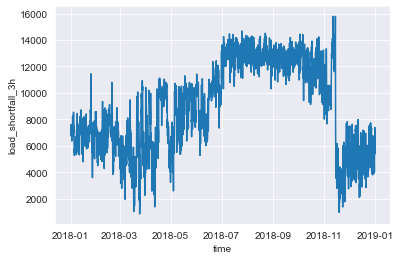

In [78]:
#Visualizing the 
sns.lineplot(x='time',y='load_shortfall_3h',data=df_submit)

<AxesSubplot:xlabel='time', ylabel='load_shortfall_3h'>

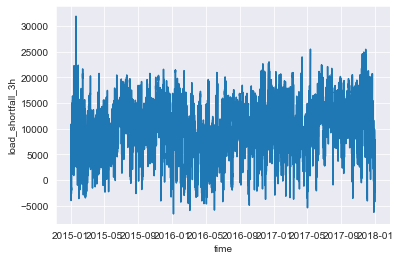

In [79]:
#Visualizing the test data for comparison 
sns.lineplot(x='time',y='load_shortfall_3h',data=df_train)

In [80]:
# Create a submission file
sub_file = df_submit.copy()

# Create file
sub_file.to_csv('Multiprocessing_Moguls.csv', index = False)